#### Amazon Review

In [1]:
import bamboolib as bam
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns

Load data set

In [2]:
review=pd.read_csv("/Users/damilolaodunuga/Downloads/PC File/ALY 6040/Reviews.csv")

Data cleaning: replacing null values and renaming null observations

In [3]:
review[['Summary']] = review[['Summary']].fillna(review[['Summary']].mode().iloc[0])
review[['ProfileName']] = review[['ProfileName']].fillna(review[['ProfileName']].mode().iloc[0])
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [124]:
# checking for duplicate
review[review.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


Brief EDA to show box plot of Scores and summary statistics of numerical columns

In [5]:
# summary statistics
review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


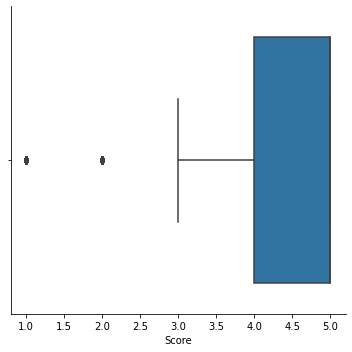

In [6]:
# Box plot of review score
sns.catplot(x='Score', kind='box', data=review)

Remove review scores that are unhelpful and reduce to less than 25,000 due to data size

In [7]:
# reduce data and drop scores less than 2
helpful=review.loc[(review['Score'] > 2) & (review['Id'] < 25000)]
helpful

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...
24992,24993,B0078Y6OX8,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1291852800,Rich aroma evokes a confectionery; light roast...,Be prepared for visitors. The decadent aroma o...
24994,24995,B0078Y6OX8,A1MEVBD79PNUI7,Molly A. Wall,1,1,5,1290729600,Great aroma and taste,"Great flavor, and the aroma is fantastic. If y..."
24995,24996,B0078Y6OX8,A2O8ULU9VP1Y3U,fawilson,1,1,5,1290556800,So Flavorful!!!!,I absolutely love the flavor of this coffee. ...
24997,24998,B0078Y6OX8,A38ETR815F3B2Y,newcoffeefan,1,1,5,1289520000,One taste and you are converted!,This is the best coffee flavor I have tried in...


Installing packages to remove Stopwords, by retaining helpful words.

In [8]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/damilolaodunuga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/damilolaodunuga/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


MODEL WITH NOUNS

In [9]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Strip out nouns from data set

In [10]:
# Pull out nouns from data set
review_nouns = pd.DataFrame(helpful.Text.apply(nouns))

Remove unhelpful words by using Stop Word

In [11]:
# Re-add the additional stop words since we are recreating the document-term matrix
from sklearn.feature_extraction import text

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

Converting data to matrix using CountVectorizer

In [12]:
#Improt countvectorizer to convert data set into matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words=stop_words)
review_count = count.fit_transform(review_nouns.Text)
review_dtmn = pd.DataFrame(review_count.toarray(), columns=count.get_feature_names())
review_dtmn.index = review_nouns.index

In [13]:
review_count.shape

(21298, 18706)

In [14]:
# Import matutilis, scipy.sparse as needed
import gensim
from gensim import matutils, models
import scipy.sparse

Create gensim format from sparse matrix

In [15]:
# gensim format
corpusr = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(review_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordr = dict((v, k) for k, v in count.vocabulary_.items())

Build model with Nouns

In [16]:
review_dan = models.LdaModel(corpus=corpusr, num_topics=3, id2word=id2wordr, passes=10)
review_dan.print_topics()

[(0,
  '0.043*"food" + 0.032*"dog" + 0.020*"treats" + 0.020*"dogs" + 0.015*"product" + 0.012*"chicken" + 0.012*"treat" + 0.010*"cat" + 0.009*"toy" + 0.008*"cats"'),
 (1,
  '0.068*"coffee" + 0.035*"tea" + 0.023*"flavor" + 0.020*"cup" + 0.018*"taste" + 0.011*"product" + 0.010*"amazon" + 0.009*"cups" + 0.008*"sugar" + 0.008*"blend"'),
 (2,
  '0.021*"chips" + 0.019*"flavor" + 0.015*"taste" + 0.015*"product" + 0.011*"bag" + 0.010*"amazon" + 0.009*"chocolate" + 0.008*"salt" + 0.007*"calories" + 0.007*"price"')]

Visualization of words using WordCloud

In [1]:
# import wordcloud
from wordcloud import WordCloud

# import expression library
import re

In [18]:
# Remove punctuations
review_nouns['review_text_processed'] = \
review_nouns['Text'].map(lambda x: re.sub('[%</>,\.!?]', '', x))

# Convert the titles to lowercase
review_nouns['review_text_processed'] = \
review_nouns['review_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
review_nouns['review_text_processed'].head()

0    vitality food products quality product stew me...
2    confection centuries citrus gelatin nuts case ...
4    great taffy price assortment yummy taffy deliv...
5    hair taffy pound bag taffy flavors watermelon ...
6    saltwater taffy flavors candy none candies ver...
Name: review_text_processed, dtype: object

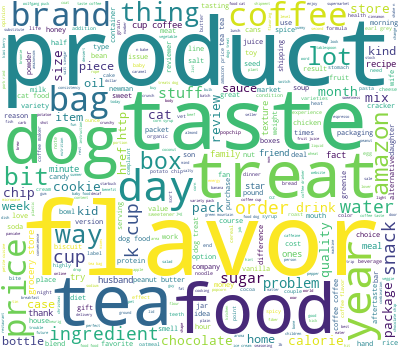

In [25]:
# Join the different processed titles together.
long_string = ','.join(list(review_nouns['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=25, height=350, contour_color='Set1', stopwords=stop_words)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Bar Graph of common words

In [29]:
# join processed text to existing dataframe
all_headlines = ' '.join(review_nouns['review_text_processed'].str.lower())

In [28]:
import collections # needed counting
from collections import Counter
from pylab import rcParams

In [26]:
# filter words that are not stop words
filtered_words = [word for word in all_headlines.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(50):
    words.append(letter)
    counts.append(count)

<BarContainer object of 50 artists>

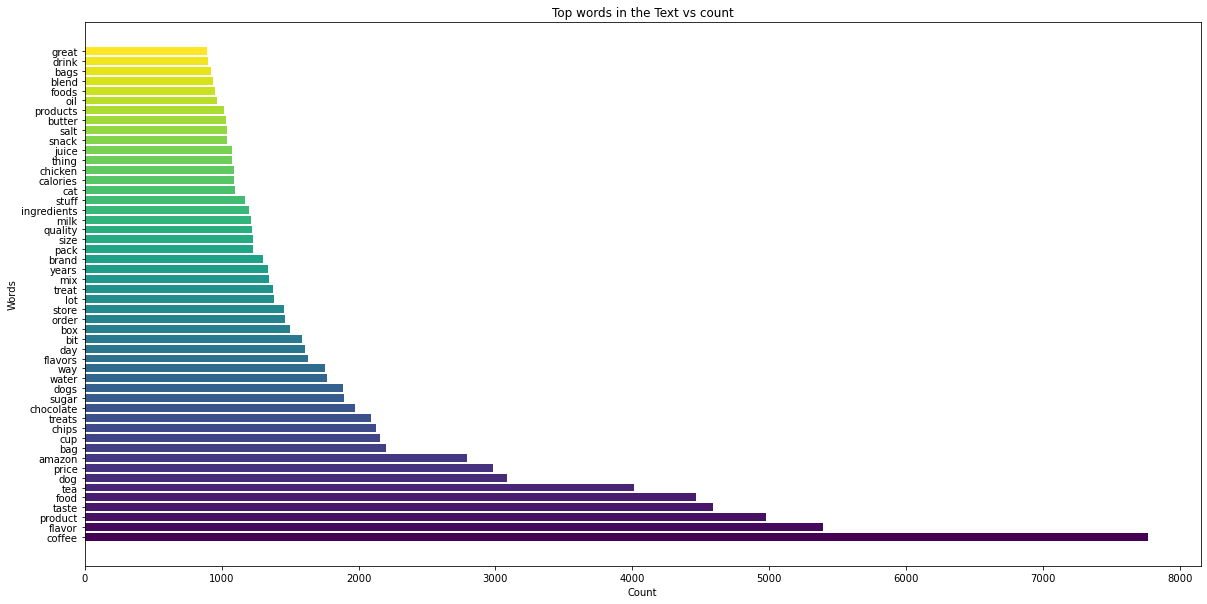

In [27]:
# plot bar graph of top words
colors = cm.viridis(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Text vs count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

<AxesSubplot:>

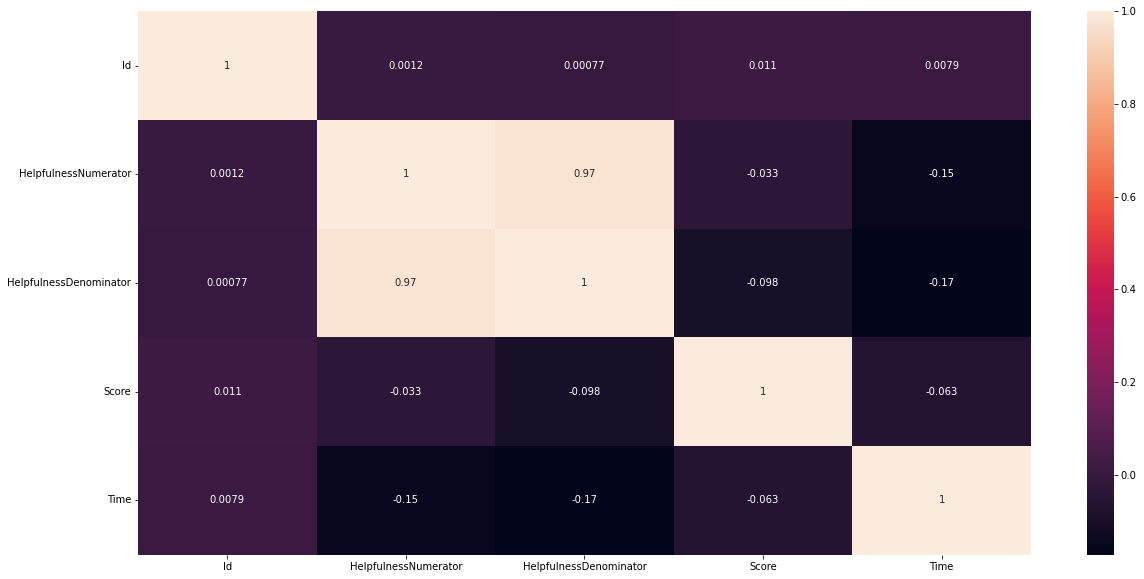

In [30]:
# correlation of numerical variables
correlation = review.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
           annot=True)

MODEL WITH NOUN AND ADJECTIVE

In [116]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(all_nouns_adj)

In [117]:
review_nouns_adj = pd.DataFrame(helpful.Text.apply(nouns_adj))

In [118]:
# re-add stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [121]:
#reduce stop words and create document-term matrix for noun_adj

cvna = CountVectorizer(stop_words=stop_words)
review_cvna = cvna.fit_transform(review_nouns_adj.Text)
review_dtmna = pd.DataFrame(review_cvna.toarray(), columns=cvna.get_feature_names())
review_dtmna.index = review_nouns_adj.index

In [122]:
# gensim format
corpusra = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(review_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordra = dict((v, k) for k, v in cvna.vocabulary_.items())

Build model with noun and adjective

In [123]:
review_noun_adj = models.LdaModel(corpus=corpusra, num_topics=3, id2word=id2wordra, passes=10)
review_noun_adj.print_topics()

[(0,
  '0.029*"food" + 0.025*"dog" + 0.015*"treats" + 0.015*"dogs" + 0.010*"product" + 0.009*"good" + 0.009*"treat" + 0.008*"great" + 0.008*"cat" + 0.007*"little"'),
 (1,
  '0.050*"coffee" + 0.026*"tea" + 0.016*"flavor" + 0.015*"cup" + 0.015*"good" + 0.012*"great" + 0.012*"taste" + 0.010*"amazon" + 0.010*"product" + 0.008*"price"'),
 (2,
  '0.018*"good" + 0.016*"chips" + 0.016*"great" + 0.014*"flavor" + 0.011*"taste" + 0.010*"product" + 0.008*"sweet" + 0.008*"bag" + 0.007*"amazon" + 0.006*"best"')]